In [4]:
!pip install yfinance

     ---------------------------------------- 73.0/73.0 kB 4.2 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 62.6/62.6 kB ? eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 11.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.1-py3-none-any.whl size=136948 sha256=40cd5a6b67c588491ff9d6036586f03de255b33b9071c224f608be94ceb2d848
  Stored in directory: c:\users\lab-321\appdata\local\pip\cache\wheels\f3\60\5b\41a9bbd32037a7211f550249f5dc798e55c20d42c49deeaf25
Successfully built peewee
  Attempting uninstall: requests
    Found existi

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
tensorboard 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import tensorflow as tf

In [6]:
code = '^KS11'  # KOSPI Composite Index
kospi = yf.Ticker(code)
kospi = kospi.history(period='20y')
kospi = kospi[['Close']]
print(kospi)

                                 Close
Date                                  
2004-04-06 00:00:00+09:00   906.190002
2004-04-07 00:00:00+09:00   909.929993
2004-04-08 00:00:00+09:00   916.859985
2004-04-09 00:00:00+09:00   905.440002
2004-04-12 00:00:00+09:00   918.859985
...                                ...
2024-03-28 00:00:00+09:00  2745.820068
2024-03-29 00:00:00+09:00  2746.629883
2024-04-01 00:00:00+09:00  2747.860107
2024-04-02 00:00:00+09:00  2753.159912
2024-04-03 00:00:00+09:00  2706.969971

[4941 rows x 1 columns]


In [7]:
dates = kospi.Close.index
X = np.arange(len(dates)).reshape(-1, 1)
y = kospi.Close.values
y = y.reshape(-1, 1)

In [8]:
y_std = y.std()
y_mean = y.mean()
y = (y - y_mean) / y_std

In [9]:
test_period = 10

X_train = X[:-test_period]
y_train = y[:-test_period]
X_test = X[-test_period:]
y_test = y[-test_period:]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [11]:
X = X.reshape(-1, 1, 1)
X_train = X_train.reshape(-1, 1, 1)
X_val = X_val.reshape(-1, 1, 1)
X_test = X_test.reshape(-1, 1, 1)

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=(None, 1)),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(1)])

model.compile(optimizer='adam', loss='mse')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 8)                 320       
                                                                 
 dense (Dense)               (None, 4)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
hist = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/15
108/108 [==============================] - 3s 6ms/step - loss: 1.0106 - val_loss: 0.8784
Epoch 2/15
108/108 [==============================] - 0s 2ms/step - loss: 0.8477 - val_loss: 0.7488
Epoch 3/15
108/108 [==============================] - 0s 2ms/step - loss: 0.6831 - val_loss: 0.5883
Epoch 4/15
108/108 [==============================] - 0s 2ms/step - loss: 0.5644 - val_loss: 0.4476
Epoch 5/15
108/108 [==============================] - 0s 2ms/step - loss: 0.3959 - val_loss: 0.4820
Epoch 6/15
108/108 [==============================] - 0s 2ms/step - loss: 0.3662 - val_loss: 0.3089
Epoch 7/15
108/108 [==============================] - 0s 2ms/step - loss: 0.3323 - val_loss: 0.3637
Epoch 8/15
108/108 [==============================] - 0s 2ms/step - loss: 0.3071 - val_loss: 0.4903
Epoch 9/15
108/108 [==============================] - 0s 2ms/step - loss: 0.3352 - val_loss: 0.3839
Epoch 10/15
108/108 [==============================] - 0s 2ms/step - loss: 0.2915 - val_loss: 0.2831

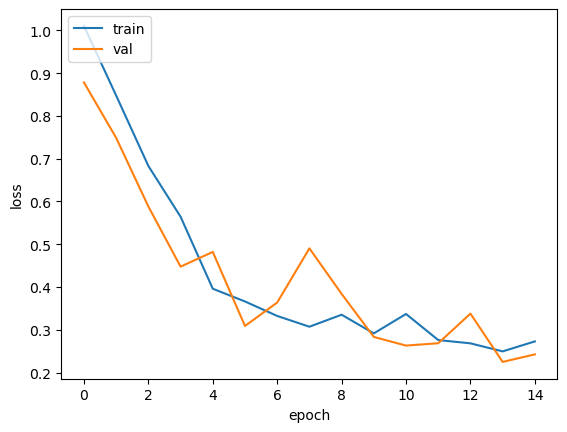

In [14]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [15]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
valScore = model.evaluate(X_val, y_val, verbose=0)
testScore = model.evaluate(X_test, y_test, verbose=0)

print('Train Score: ', trainScore)
print('Validataion Score: ', valScore)
print('Test Score: ', testScore)

Train Score:  0.23265813291072845
Validataion Score:  0.24241015315055847
Test Score:  0.4086831212043762
